# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    n = 0
    x = x0
    accuracy = 1000
    while (n < maxiter and accuracy > eps):
        n += 1
        xnew = x - f(x)/fder(f, x)
        accuracy = abs(x - xnew)
        x = xnew
    return x, n
        

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [3]:
def f1(x):
    return x**2 - 1

def fder(f, x):
    a = 1e-3
    #
    return (f(x+a) - f(x-a)) / (2*a)

root, number_of_iterations = newton_iteration(f1, fder, 0.5)

print('The root is ', root)
print('Number of iterations is ', number_of_iterations)

The root is  1.000000000000001
Number of iterations is  5


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

best m for this function is = 2 , with 5 iterations to reach the accuracy


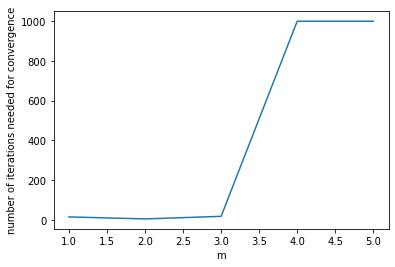

In [4]:
def newton_iteration_for_multiple_roots(f, fder, m, x0, eps=1e-5, maxiter=1000):
    #
    n = 0
    x = x0
    accuracy = 1000
    while (n < maxiter and accuracy > eps):
        n += 1
        xnew = x - m * f(x) / fder(f, x)
        accuracy = abs(x - xnew)
        x = xnew
    return x, n
    #

def f2(x):
    return (x**2 - 1)**2

ms = []
number_of_iterations_list = []
for m in range(1,6):
    _, number_of_iterations = newton_iteration_for_multiple_roots(f2, fder, m, 0.5)
    ms.append(m)
    number_of_iterations_list.append(number_of_iterations)

#########

plt.plot(ms, number_of_iterations_list)
plt.xlabel('m')
plt.ylabel('number of iterations needed for convergence')

argmin = np.argmin(number_of_iterations_list)
best_m = ms[argmin]
ni = number_of_iterations_list[argmin]
print(f'best m for this function is = {best_m} , with {ni} iterations to reach the accuracy')

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

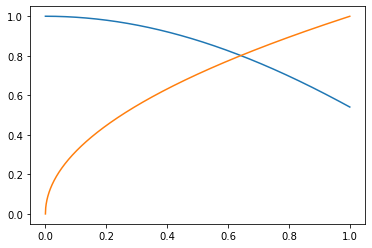

In [5]:
x = np.arange(0, 1, 0.0005)

cosx = np.cos(x)
radx = np.sqrt(x)

plt.plot(x, cosx)
plt.plot(x, radx)

plt.show()

root of this function is around 0.625 

In [6]:
from math import sqrt, cos
def fx(x):
    return sqrt(x) - cos(x)

def gx(x, fx):
    return x - fx(x)

def fixed_pt_iteration(x0, fx, gx, epsilon=0.0001, max_iter=10000):
    n = 0
    x = x0
    accuracy = 1000
    while (n<max_iter and accuracy>epsilon):
        n += 1
        a = gx(x, fx)
        accuracy = abs(x - a)
        x = a
    return x

root_of_fx = fixed_pt_iteration(0.6, fx, gx, epsilon=1e-8)

print(root_of_fx)

0.6417143702656569


0.6417143702656569 (estimate) vs 0.625 (visual inspection)

The best value for alpha is =  0.8000000000000002


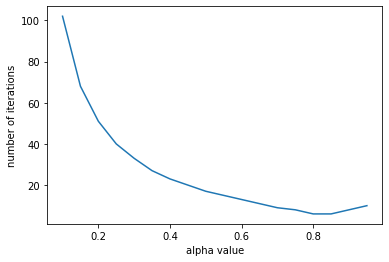

In [7]:
def gx_with_alpha(x, fx, alpha):
    return x - alpha * fx(x)

def fixed_pt_iteration_with_alpha(x0, fx, gx_with_alpha, alpha, epsilon=0.0001, max_iter=10000):
    n = 0
    x = x0
    accuracy = 1000
    while (n<max_iter and accuracy>epsilon):
        n += 1
        a = gx_with_alpha(x, fx, alpha)
        accuracy = abs(x - a)
        x = a
    return x, n

alphas = []
number_of_iterations = []
for alpha in np.arange(0.1, 0.99, 0.05):
    _, n = fixed_pt_iteration_with_alpha(0.6, fx, gx_with_alpha, alpha, epsilon=1e-8)
    alphas.append(alpha)
    number_of_iterations.append(n)
    
# print(root_of_fx)
plt.plot(alphas, number_of_iterations)
plt.xlabel('alpha value')
plt.ylabel('number of iterations')

argmin = np.argmin(number_of_iterations)
print('The best value for alpha is = ', alphas[argmin])


In [8]:
# We select the interval to be between 0.6 and 0.7

# for example choose m and M like this.
a = (fx(0.6001) - fx(0.5999)) / 0.0002
b = (fx(0.7001) - fx(0.6999)) / 0.0002

m = min(a, b)
M = max(a, b)

def optimal_value_of_alpha_by_formula(m, M):
    return 2 / (m+M)

optimal_value_of_alpha_by_formula(m, M)

0.8156701021464831

optimal value of alpha by formula = 0.8156701021464831 

                Vs
    
optimal value of alpha by real experiment = 0.8000000000000002

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.